In [1]:
# %load "data_stuff.py"
from numpy import int64
import pandas as pd
import matplotlib.pyplot as plt

# importing the CANLOG09 csv file
df = pd.read_csv('CANLOG09.csv')

# df[' B0'] = df[' B0'].apply(int, base=16)
# df[' B1'] = df[' B1'].apply(int, base=16)
# df[' B2'] = df[' B2'].apply(int, base=16)
# df[' B3'] = df[' B3'].apply(int, base=16)
# df[' B4'] = df[' B4'].apply(int, base=16)
# df[' B5'] = df[' B5'].apply(int, base=16)

# b16 = lambda x: int(str(x),16)


# df[' B6'] = df[' B6'].apply(b16)
# df[' B7'] = df[' B7'].apply(b16)

In [2]:
df

,Millis,ID,Ext,Bus,Len,B0,B1,B2,B3,B4,B5,B6,B7
0,423,534,0,0,2,ae,7,0,0,0,0,0,0
1,429,508,0,0,5,0,0,0,0,1,0,0,0
2,436,509,0,0,6,7f,ff,7f,ff,7f,ff,0,0
3,442,514,0,0,3,3,ff,0,0,0,0,0,0
4,448,512,0,0,4,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2680,21330,504,0,0,3,0,cb,1,0,0,0,0,0
2681,21338,509,0,0,6,7f,ff,7f,ff,7f,ff,0,0
2682,21345,540,0,0,6,9,90,0,9,90,0,0,0
2683,21353,554,0,0,4,0,0,0,0,0,0,0,0


In [3]:
df = df.set_index('Millis')

In [4]:
df.columns

Index([' ID', ' Ext', ' Bus', ' Len', ' B0', ' B1', ' B2', ' B3', ' B4', ' B5',
       ' B6', ' B7'],
      dtype='object')

In [5]:
for k in range(len(df.columns.values)):
    df.columns.values[k] = df.columns.values[k].strip()

In [6]:
df.columns

Index(['ID', 'Ext', 'Bus', 'Len', 'B0', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6',
       'B7'],
      dtype='object')

In [7]:
df.dtypes

ID     object
Ext     int64
Bus     int64
Len     int64
B0     object
B1     object
B2     object
B3     object
B4     object
B5     object
B6      int64
B7      int64
dtype: object

In [8]:
df['B6'] = df['B6'].astype('object')
df['B7'] = df['B7'].astype('object')

In [9]:
df.dtypes

ID     object
Ext     int64
Bus     int64
Len     int64
B0     object
B1     object
B2     object
B3     object
B4     object
B5     object
B6     object
B7     object
dtype: object

In [10]:
df.head(8)

,ID,Ext,Bus,Len,B0,B1,B2,B3,B4,B5,B6,B7
Millis,,,,,,,,,,,,
423,534,0,0,2,ae,7,0,0,0,0,0,0
429,508,0,0,5,0,0,0,0,1,0,0,0
436,509,0,0,6,7f,ff,7f,ff,7f,ff,0,0
442,514,0,0,3,3,ff,0,0,0,0,0,0
448,512,0,0,4,0,0,0,0,0,0,0,0
454,50C,0,0,3,77,6,1,0,0,0,0,0
467,500,0,0,1,1,0,0,0,0,0,0,0
472,504,0,0,3,0,cb,1,0,0,0,0,0


In [11]:
def hex_to_binary(my_hexdata):
    scale = 16 ## equals to hexadecimal
    num_of_bits = 8
#     print(my_hexdata)
    return bin(int(my_hexdata, scale))[2:].zfill(num_of_bits)
    
# Taken from this StackOverflow post: https://stackoverflow.com/questions/1425493/convert-hex-to-binary

In [12]:
df.loc[:,['B0','B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7']] = df.loc[:,['B0','B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7']].applymap(str).applymap(hex_to_binary)

In [13]:
front_controls = df[df['ID'] == '500'].copy()

In [14]:
front_controls['START'] = front_controls['B0'].apply(lambda x: x[1]).apply(lambda x: int(x, 2))
front_controls['STOP'] = front_controls['B0'].apply(lambda x: x[2]).apply(lambda x: int(x, 2))
front_controls['ESTOP'] = front_controls['B0'].apply(lambda x: x[3]).apply(lambda x: int(x, 2))
front_controls['Rotary Position Switch'] = front_controls['B0'].apply(lambda x: x[4 : 8]).apply(lambda x: int(x, 2))

In [15]:
front_controls

,ID,Ext,Bus,Len,B0,B1,B2,B3,B4,B5,B6,B7,START,STOP,ESTOP,Rotary Position Switch
Millis,,,,,,,,,,,,,,,,
467,500,0,0,1,00000001,00000000,00000000,00000000,00000000,00000000,00000000,00000000,0,0,0,1
517,500,0,0,1,00000001,00000000,00000000,00000000,00000000,00000000,00000000,00000000,0,0,0,1
574,500,0,0,1,00000001,00000000,00000000,00000000,00000000,00000000,00000000,00000000,0,0,0,1
628,500,0,0,1,00000001,00000000,00000000,00000000,00000000,00000000,00000000,00000000,0,0,0,1
641,500,0,0,1,00000001,00000000,00000000,00000000,00000000,00000000,00000000,00000000,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21183,500,0,0,1,00000001,00000000,00000000,00000000,00000000,00000000,00000000,00000000,0,0,0,1
21252,500,0,0,1,00000001,00000000,00000000,00000000,00000000,00000000,00000000,00000000,0,0,0,1
21267,500,0,0,1,00000001,00000000,00000000,00000000,00000000,00000000,00000000,00000000,0,0,0,1


In [16]:
pt = pd.pivot_table(front_controls, values=['START', 'STOP', 'ESTOP', 'Rotary Position Switch'], index='Millis')

<AxesSubplot:xlabel='Millis'>

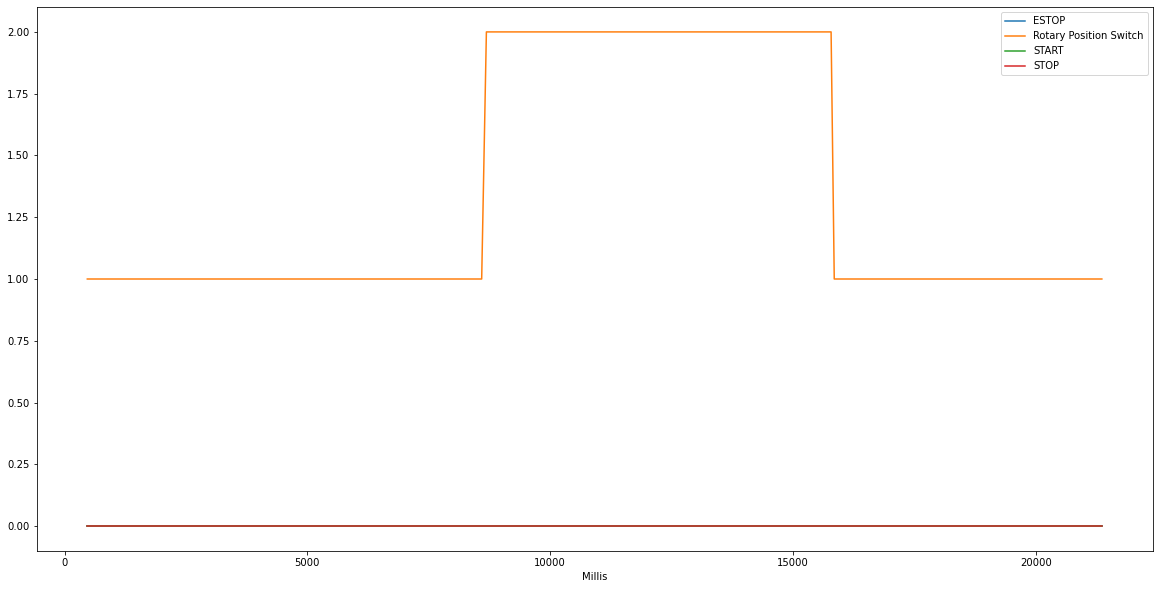

In [17]:
pt.plot(figsize = (20, 10))